# Software Defect Detection


## 1. Introduction

Software defect detection is an application area that employs machine learning models for automatically identifying defective parts in programs.

In this assignment you will explore various classifiers with multiple datasets. The purpose is to measure the performance of the following well-established algorithms in software defect detection tasks.


### Classifiers
The classifiers to be studied are:
* $C_1$: Logistic Regression
* $C_2$: Perceptron
* $C_3$: Support Vector Machines (with linear &amp; RBF kernel)
* $C_4$: Decision Tree
* $C_5$: Random Forests
* $C_6$: Feed-forward Neural Network


### Datasets
The classification performance of the abovementioned algorithm will be studied in a collection of 3 datasets on software defect detection. The datasets are:

* `jm1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1053))
* `mc1` (Description [here](https://www.openml.org/search?type=data&status=active&id=1056))
* `pc3` (Description [here](https://www.openml.org/search?type=data&status=active&id=1050))

**All datasets are provided with the assignment in the present compressed file.**

There cases of missing values in the datasets. These cases should be addressed by removing the **rows** with missing values.


## 2. Experiments

You will use 80% of the datasets for training and 20% for testing by applying the 5-fold cross validation technique. The algorithms will be evaluated by measuring the values of the four following well-established metrics:
* $M_1$: Accuracy
* $M_2$: F1-score
* $M_3$: G-Mean score
* $M_4$: Fit time

Repeat your experiments with different features' normalization methods:
* $N_1$: No normalization (use raw features)
* $N_2$: Min-max normalization
* $N_3$: Feature Standardization



## 3. Deliverable & Deadline

You will work in pairs according to your preferences.

The deliverable will be a notebook, using both surnames as a file name. This file should include the code and the results for each one of the 3 datasets. Both students of a team must upload the same file into the e-learning platform. **Only one file per pair will be checked. So, if you upload different versions, then one of them will not be examined. You are free to use any Python library, even if it is not a part of Anaconda3. However, in the latter case, please make sure that you mention the appropriate conda or pip command for installing the library.**

**For each dataset, your notebook should present:**

* 4 bar plots that will compare the performance ($M1$, $M2$, $M3$, and $M4$) of the six classifiers ($C1$, $C2$, $C3$, $C4$, $C5$, and $C6$) for the cases $N_1$, $N_2$, and $N_3$ (please consult the example in the figure below).
* A discussion on the performance of the classifiers.

**The deadline is 30/01/2024. NO DEADLINE EXTENSION WILL BE GIVEN.**

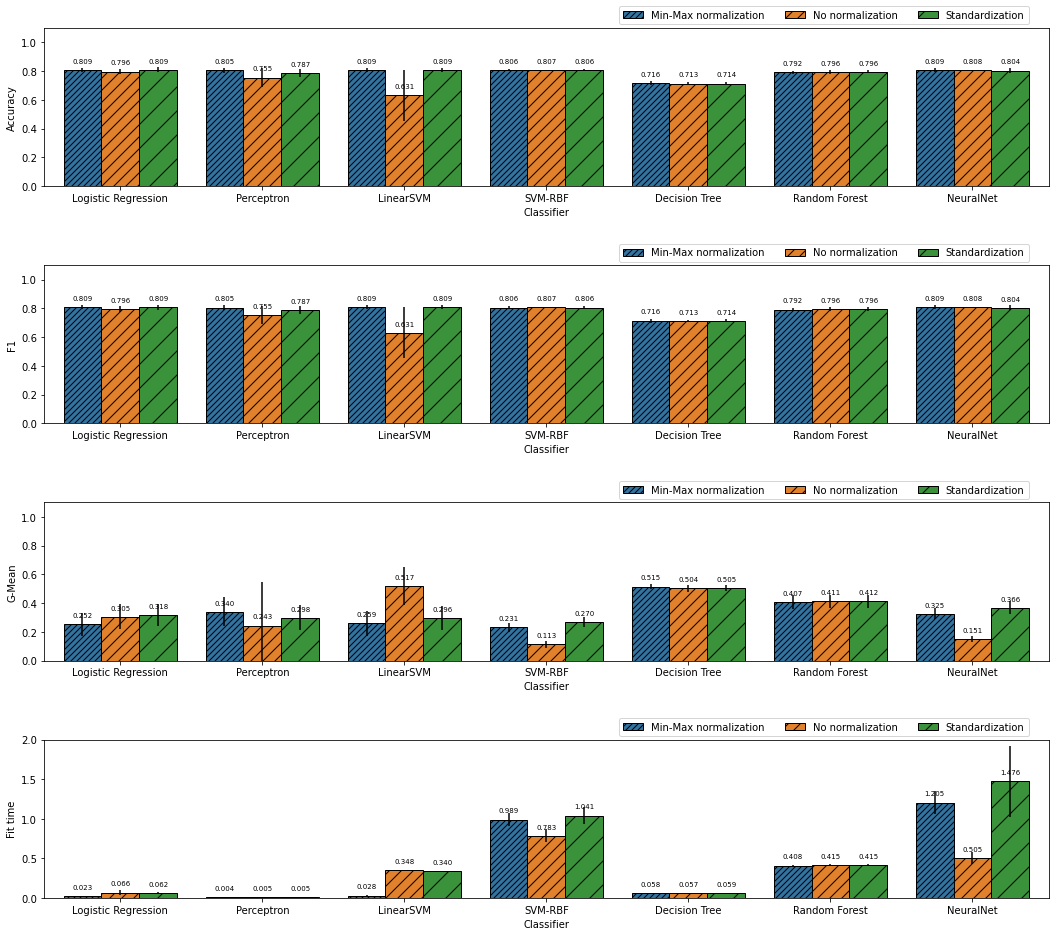

# Dataset 1: jm1.csv

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
set1 = pd.read_csv('jm1.csv',sep=",")

set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [12]:
set1.isnull().values.any()

False

We have a dataset with 20 columns, feautures, no missing values and one target value. However there is something wrong, since for the feautures uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount we expect to take numerical values but instead we are taking variable type int.

In [13]:
print(set1['uniq_Opnd'].unique())

['1.2' '1' '36' '135' '16' '24' '0' '5' '12' '23' '4' '64' '10' '47' '59'
 '56' '113' '25' '103' '29' '44' '21' '28' '7' '15' '57' '63' '53' '6'
 '76' '51' '30' '17' '8' '19' '18' '52' '32' '20' '40' '22' '86' '3' '78'
 '14' '11' '68' '38' '9' '13' '42' '67' '49' '?' '43' '34' '27' '33' '45'
 '26' '48' '46' '35' '87' '101' '104' '165' '126' '75' '112' '62' '77'
 '162' '31' '138' '80' '160' '58' '69' '60' '70' '2' '50' '71' '175' '39'
 '37' '54' '73' '65' '41' '66' '85' '95' '74' '94' '102' '88' '147' '117'
 '84' '55' '81' '132' '61' '140' '96' '90' '146' '806' '154' '110' '241'
 '128' '99' '119' '127' '164' '91' '142' '72' '89' '137' '174' '122' '93'
 '108' '83' '256' '176' '152' '100' '134' '79' '82' '115' '215' '133'
 '182' '183' '97' '111' '109' '549' '157' '158' '136' '168' '355' '195'
 '121' '167' '1026' '262' '279' '407' '226' '811' '609' '264' '145' '125'
 '118' '129' '139' '159' '98' '92' '105' '114' '107' '148']


We find that we have a value of ? in our values. As our definition of the exercise implies, we will delete all these rows and feautures that have such values.

In [14]:
prob_features= ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
set1 = set1.replace('?', pd.NaT).dropna(subset=prob_features)

for column in prob_features:
    set1[column] = pd.to_numeric(set1[column], errors='coerce')

Let's check the values  of these columns again and see if they have taken the correct type for the variables.

In [15]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            10880 no

Great,now we have the correct types for our feautures. Let's see the nature of them.

In [16]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
set1.describe()


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000,10880.000
mean,42.020,6.348,3.400,4.001,114.391,673.772,0.135,14.177,29.439,36845.629,0.225,2046.980,26.253,2.739,4.625,0.371,11.178,16.752,68.111,46.389,11.292
std,76.609,13.022,6.773,9.119,249.549,1939.253,0.161,18.712,34.423,434467.148,0.647,24137.064,59.623,9.010,9.970,1.908,10.045,26.668,151.514,100.352,22.598
min,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
25%,11.000,2.000,1.000,1.000,14.000,48.430,0.030,3.000,11.860,161.940,0.020,9.000,4.000,0.000,0.000,0.000,5.000,4.000,8.000,6.000,3.000
50%,23.000,3.000,1.000,2.000,49.000,217.130,0.080,9.090,21.925,2031.020,0.070,112.830,13.000,0.000,2.000,0.000,11.000,11.000,29.000,19.000,5.000
75%,46.000,7.000,3.000,4.000,119.000,620.850,0.160,18.902,36.780,11416.145,0.210,634.235,28.000,2.000,5.000,0.000,16.000,21.000,71.000,48.000,13.000
max,3442.000,470.000,165.000,402.000,8441.000,80843.080,1.300,418.200,569.780,31079782.270,26.950,1726654.570,2824.000,344.000,447.000,108.000,411.000,1026.000,5420.000,3021.000,826.000


Something that it's really important to notice is that there are outliers in all the columns that affects importantly the values of the mean and probably the quality of the classification.

In order to understand that let's check the nature of the feauture loc. Feauture loc describes how many rows exists in a block of a code. The 50% of them are max at 23 rows, but the mean is 42.02, approximately 100% up!

There are points that have 3442 of blocks of code. That's not the case! In these exercise we will deal the by transforming the data with 2 methods (min max scaling,feature standardization) and we will keep no transformation just for the comparison.

Now let's see the balance of the dataset.

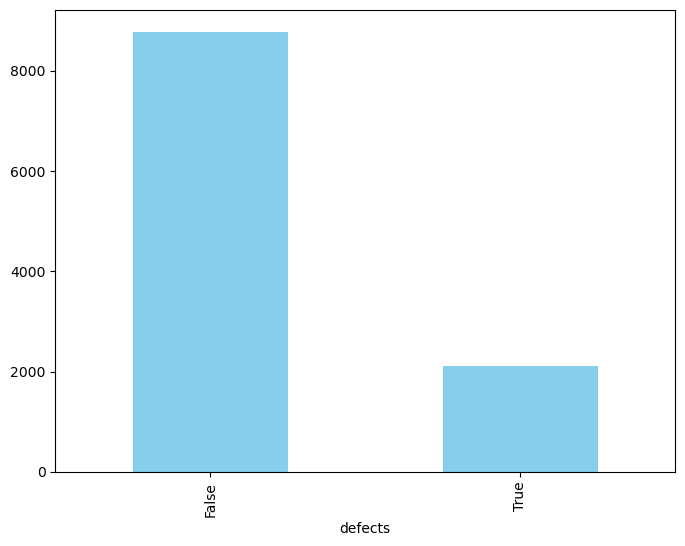

In [17]:
plt.figure(figsize=(8, 6))
set1['defects'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

Its completely clear that we are talking about an imbalanced dataset.

In [18]:
pd.set_option('display.float_format', '{:.3f}'.format)

We build a function that we run all the models and return us the results.We will use Pipelines in order to transform and fit our data when need and k fold cross validation for better accurancy

In [19]:
def run_expiriments(X, Y, scaler):
    warnings.filterwarnings("ignore")
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'g_mean':make_scorer(geometric_mean_score, greater_is_better=True)
   }    
    pipelines = [
        ('Logistic Regression', Pipeline([('scaler', scaler), ('logistic', LogisticRegression(max_iter=1000,random_state=1))])),
        ('Perceptron', Pipeline([('scaler', scaler), ('perceptron', Perceptron(max_iter=10000, random_state=1))])),
        ('SVM Linear', Pipeline([('scaler', scaler), ('svm', SVC(kernel='linear', max_iter=10000,random_state=1))])),
        ('SVM RBF', Pipeline([('scaler', scaler), ('svm', SVC(kernel='rbf',max_iter=10000,random_state=1))])),
        ('Decision Tree', Pipeline([('scaler', scaler), ('classifier',DecisionTreeClassifier(random_state=1))])),
        ('Random Forest', Pipeline([('scaler', scaler), ('classifier',RandomForestClassifier(random_state=1))])),
        ('MLP', Pipeline([('scaler', scaler), ('classifier', MLPClassifier(activation='tanh', hidden_layer_sizes=(100,50), max_iter=1000, random_state=1))])),
    ]

    result_tables = []  

    for name, pipe in pipelines:
        cv_results = cross_validate(pipe, X, Y, cv=5, scoring=scorers, return_train_score=True)

        result_table = pd.DataFrame({
            'Classifier': [name],
            'Accuracy': [cv_results['test_accuracy_score'].mean()],
            'F1 Score': [cv_results['test_f1_score'].mean()],
            'Balanced Accuracy': [cv_results['test_balanced_accuracy_score'].mean()],
            'G_mean': [cv_results['test_g_mean'].mean()],
            'Fit Time': [cv_results['fit_time'].mean()]
        })

        result_tables.append(result_table)

    final_result_table = pd.concat(result_tables, ignore_index=True)
    return final_result_table

In [20]:
!pip install imbalanced-learn==0.8.1

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import make_scorer, f1_score, accuracy_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline



cv= 5 
Y = np.array(set1.iloc[:, 21])

X = np.array(set1.iloc[:, :21])


In [21]:
X.shape

(10880, 21)

In [22]:
JM1_None=run_expiriments(X,Y,None)
JM1_None

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.797,0.749,0.540,0.335,0.633
1,Perceptron,0.591,0.529,0.494,0.158,0.011
2,SVM Linear,0.324,0.291,0.511,0.325,0.510
3,SVM RBF,0.807,0.725,0.505,0.113,2.199
4,Decision Tree,0.713,0.719,0.563,0.507,0.138
5,Random Forest,0.792,0.757,0.560,0.407,2.045
6,MLP,0.807,0.736,0.518,0.209,1.623


In [23]:
JM1_Standard=run_expiriments(X,Y,StandardScaler())

In [24]:
JM1_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.754,0.543,0.317,0.051
1,Perceptron,0.755,0.741,0.564,0.462,0.012
2,SVM Linear,0.805,0.729,0.510,0.153,1.816
3,SVM RBF,0.806,0.744,0.528,0.270,2.616
4,Decision Tree,0.711,0.718,0.562,0.506,0.137
5,Random Forest,0.794,0.759,0.563,0.413,2.056
6,MLP,0.758,0.748,0.577,0.492,73.036


In [25]:
JM1_MinMax=run_expiriments(X,Y,MinMaxScaler())
JM1_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.754,0.543,0.317,0.051
1,Perceptron,0.755,0.741,0.564,0.462,0.012
2,SVM Linear,0.805,0.729,0.510,0.153,1.816
3,SVM RBF,0.806,0.744,0.528,0.270,2.616
4,Decision Tree,0.711,0.718,0.562,0.506,0.137
5,Random Forest,0.794,0.759,0.563,0.413,2.056
6,MLP,0.758,0.748,0.577,0.492,73.036


In [46]:
JM1_MinMax

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.809,0.744,0.528,0.252,0.024
1,Perceptron,0.803,0.739,0.524,0.244,0.013
2,SVM Linear,0.807,0.721,0.501,0.039,1.870
3,SVM RBF,0.806,0.738,0.521,0.231,2.759
4,Decision Tree,0.714,0.720,0.564,0.508,0.134
5,Random Forest,0.793,0.758,0.560,0.407,1.997
6,MLP,0.807,0.751,0.539,0.314,7.612


In [145]:
def plot_experiment_results(Exp_MinMax, Exp_None, Exp_Standard):
    Measures = ['Model', 'Accuracy', 'F1 Score', 'G_mean', 'Fit Time']
    Exp_MinMax_temp = pd.DataFrame(Exp_MinMax, columns=Measures)
    Exp_None_temp = pd.DataFrame(Exp_None, columns=Measures)
    Exp_Standard_temp = pd.DataFrame(Exp_Standard, columns=Measures)
    X = np.arange(len(df_no_scaler))

    for col in Measures[1:]:
        plt.figure(figsize=(20, 6))
        plt.bar(X - 0.2, Exp_MinMax_temp[col], width=0.2, label='Min-Max Normalization')
        plt.bar(X, Exp_None_temp[col], width=0.2, label='No Normalization')
        plt.bar(X + 0.2, Exp_Standard_temp[col], width=0.2, label='Standardization')
        
        plt.ylabel(col)
        plt.xticks(X, df_no_scaler['Classifier'])
        plt.legend()

        for i, value in enumerate(Exp_MinMax_temp[col]):
            plt.text(X[i] - bar_width, value, f'{value:.3f}', ha='center', va='bottom')
        
        for i, value in enumerate(Exp_None_temp[col]):
            plt.text(X[i], value, f'{value:.3f}', ha='center', va='bottom')
        
        for i, value in enumerate(Exp_Standard_temp[col]):
            plt.text(X[i] + bar_width, value, f'{value:.3f}', ha='center', va='bottom')
        
        plt.show()

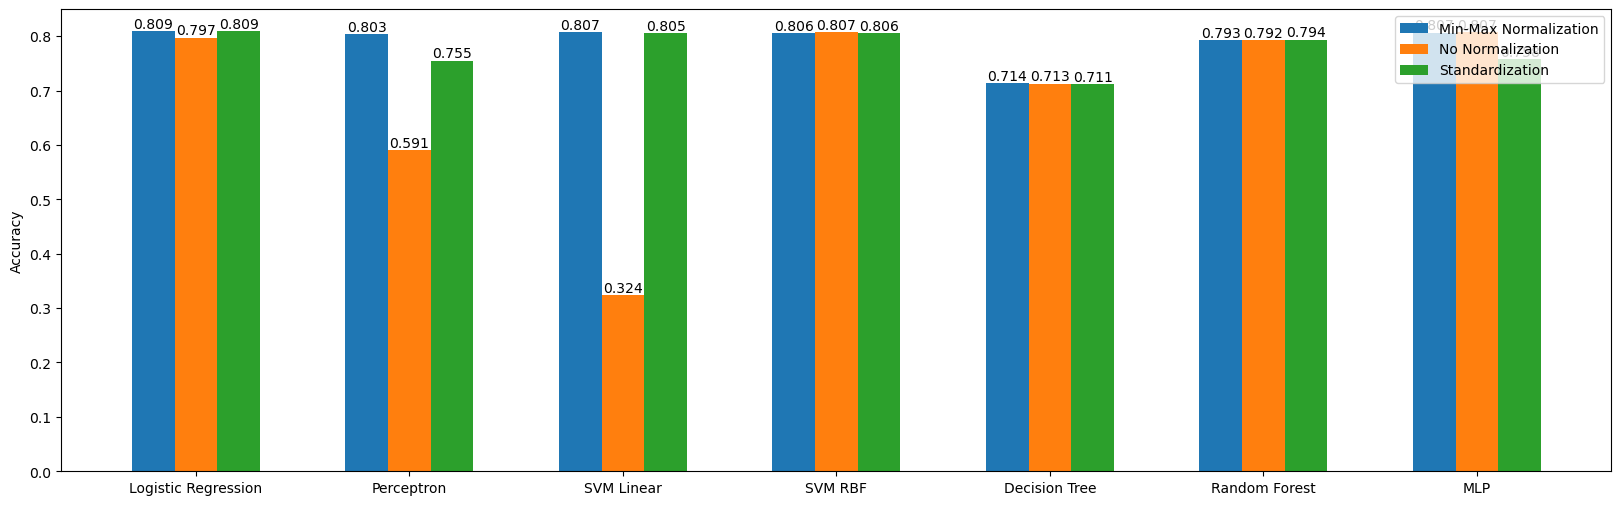

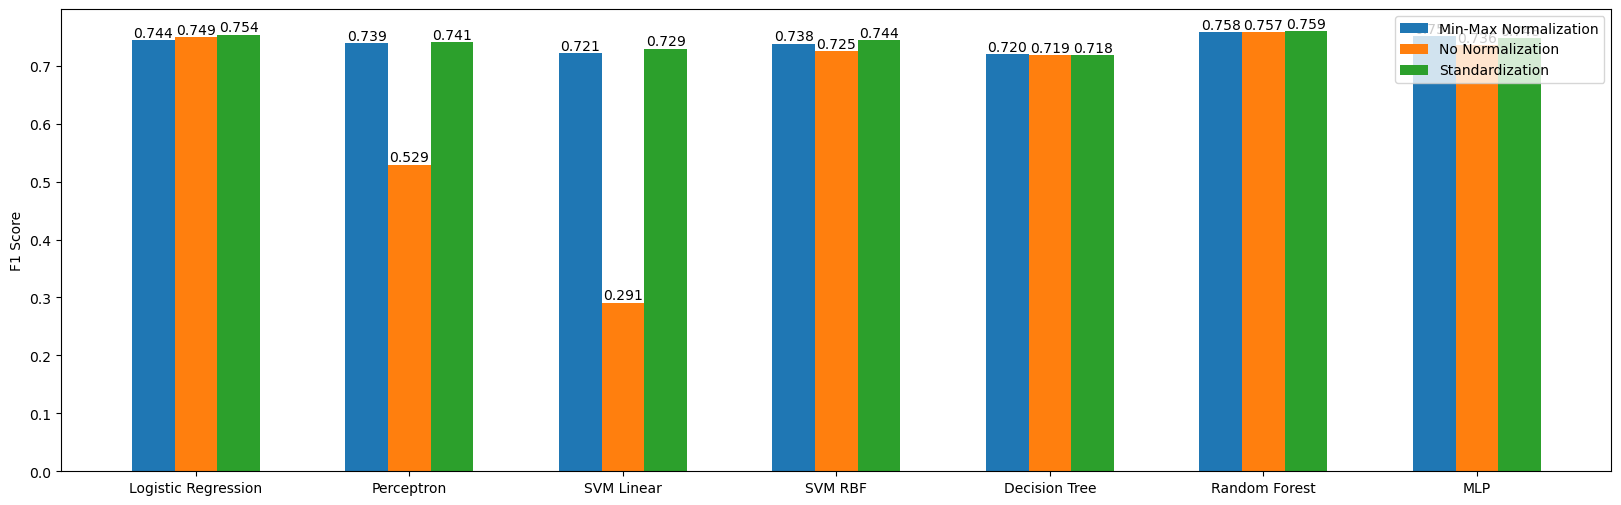

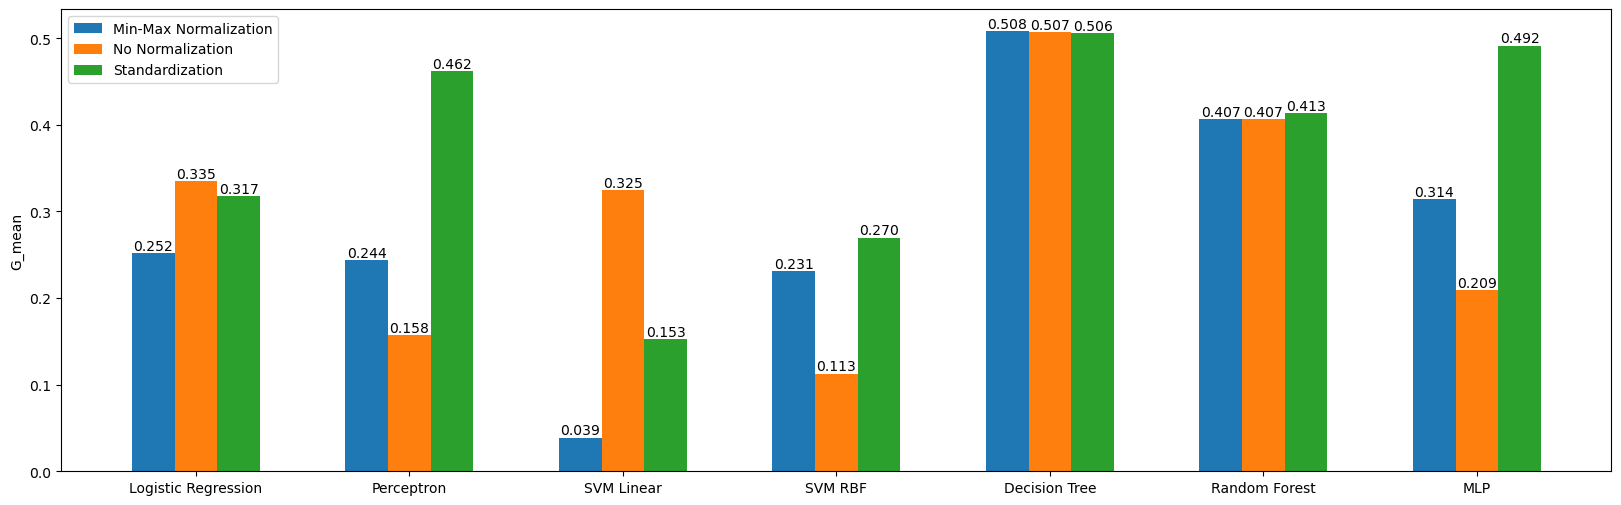

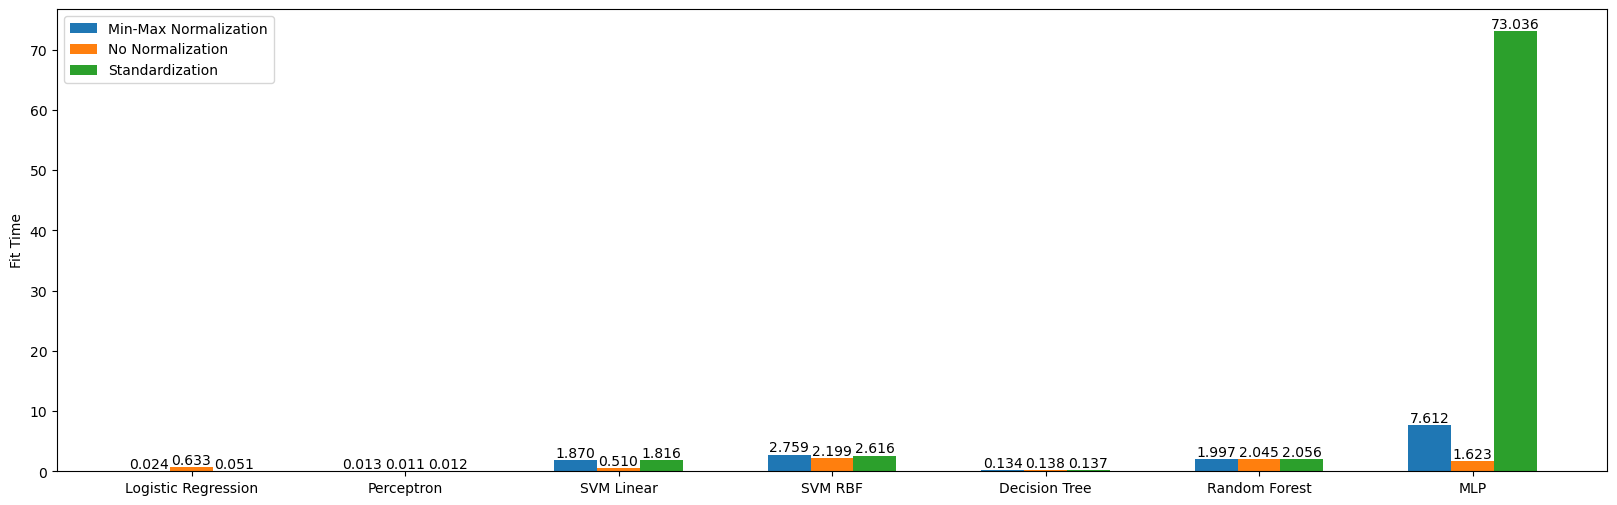

In [146]:
plot_experiment_results(JM1_MinMax, JM1_None, JM1_Standard)


Let's discuss the results for this dataset:
A) We can clearly see big difference at SVM Linear when we use Scaler compared when with no use Scaler. This is absolutely normal. SVM Linear tries to maximize distance between support vectors and the seperating hyperplane.  On this dataset we clearly mentioned from the begging the all the feautures have outliers. So, the SVM tries to fit the hyperplane to the outliers and dominate the other values and its logical because the distance between the outliers beetween the outliers and the rest of the data is already big. When we transform the data, we actually elimate the influence of the outliers.
B)Perceptron perfoms really poor with no data transformation. We expect that beacause it tries to seperate the classes linearly and that's no possible. When we transforming the data, it's more easy to seperate the classes linearly.
C)SVM RBF performs better than SVM linear because it's tries to classify the problems non linear. However, the computation time beetwen the SVM Linear and SVM RBF is almost two times bigger!
D) Decision Tree and Random Forest have almost the same perfomance no matter the normalization method. That's because they are not so sensivite to outliers because they checking the importance of each feature and if it doesn't important they eliminate. Also the rules remain the same when transforming the data, the only thing that changes it's that the value of the step functions are transformed.


The main point for this dataset (and the rest datasets that we will check later) is that it's  imbalaced. That means that we don't care so much for accurancy but for balanced accurancy and G_Mean scores. Our goal is to predict correct and the minority of the classes correctly.

F1 score we will say that follows the accurancy somehow. However, we can see some surpises in G_Mean score.
A) SVM linear G_Mean scores better when the dataset has no standardization. That means that we transform our data to this dataset, the model despite the fact that archives higher F1 Score, overfits the data to the major class.
B)If we based our results on Accurancy we will choose Logistic Regression or MLP. But if we choose based on G_Mean we will choose Decision Tree!

Something,also interesting is the high computation time for MLP at the standardization. We can explain this at oscillation that occurs during the SGD.


Again,all of the metrics indicate us that that we don't have good perfomance. G_Mean is really low and the accurancy doesn't go up to 80% no matter what. 


# Dataset 2


In [147]:
set2 = pd.read_csv('mc1.csv',sep=",")

In [148]:
set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9466 entries, 0 to 9465
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        9466 non-null   int64  
 1   BRANCH_COUNT                     9466 non-null   int64  
 2   CALL_PAIRS                       9466 non-null   int64  
 3   LOC_CODE_AND_COMMENT             9466 non-null   int64  
 4   LOC_COMMENTS                     9466 non-null   int64  
 5   CONDITION_COUNT                  9466 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            9466 non-null   int64  
 7   CYCLOMATIC_DENSITY               9466 non-null   float64
 8   DECISION_COUNT                   9466 non-null   int64  
 9   DESIGN_COMPLEXITY                9466 non-null   int64  
 10  DESIGN_DENSITY                   9466 non-null   int64  
 11  EDGE_COUNT                       9466 non-null   int64  
 12  ESSENTIAL_COMPLEXITY

There is no missing values or mismatch types. So we continue.

In [159]:
set2.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DESIGN_COMPLEXITY,DESIGN_DENSITY,EDGE_COUNT,ESSENTIAL_COMPLEXITY,ESSENTIAL_DENSITY,LOC_EXECUTABLE,PARAMETER_COUNT,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,MAINTENANCE_SEVERITY,MODIFIED_CONDITION_COUNT,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000,9466.000
mean,1.557,2.954,1.287,0.784,1.613,3.315,1.924,0.670,1.571,1.589,0.851,6.760,1.239,0.012,6.250,0.134,0.904,0.448,14.242,6.270,12649.499,0.058,34.563,0.355,702.750,175.063,0.742,0.872,1.658,6.708,0.539,13.780,20.783,5.928,6.356,12.224,7.922,7.034
std,4.578,7.764,2.590,3.650,7.257,12.886,3.998,0.365,6.229,3.355,0.356,20.342,1.309,0.110,16.864,0.597,2.514,0.497,18.027,16.385,456367.935,0.254,113.822,0.253,25353.774,762.510,0.438,3.343,6.446,16.113,0.422,48.085,66.072,10.144,5.496,27.831,17.426,18.751
min,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
25%,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.290,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,5.800,1.500,17.410,0.000,5.000,0.110,0.970,11.610,0.000,0.000,0.000,2.000,0.170,1.000,3.000,1.000,3.000,1.000,0.000,0.000
50%,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,2.000,1.000,0.000,0.000,0.000,1.000,0.000,7.750,2.000,49.130,0.010,7.000,0.330,2.730,19.650,1.000,0.000,0.000,3.000,0.500,2.000,5.000,2.000,4.000,2.000,0.000,0.000
75%,1.000,3.000,1.000,0.000,0.000,4.000,2.000,1.000,2.000,1.000,1.000,6.000,1.000,0.000,6.000,0.000,1.000,1.000,15.335,6.393,504.930,0.030,23.000,0.670,28.050,89.860,1.000,1.000,2.000,6.000,1.000,10.000,14.000,6.000,8.000,11.000,0.000,7.000
max,87.000,351.000,72.000,98.000,117.000,630.000,192.000,1.000,312.000,186.000,1.000,929.000,22.000,1.000,578.000,10.000,192.000,1.000,253.300,833.780,31159817.680,12.460,5227.000,2.000,1731100.990,37371.730,1.000,159.000,315.000,739.000,2.000,2279.000,2948.000,197.000,100.000,727.000,95.760,639.000


Again, we have outliers.

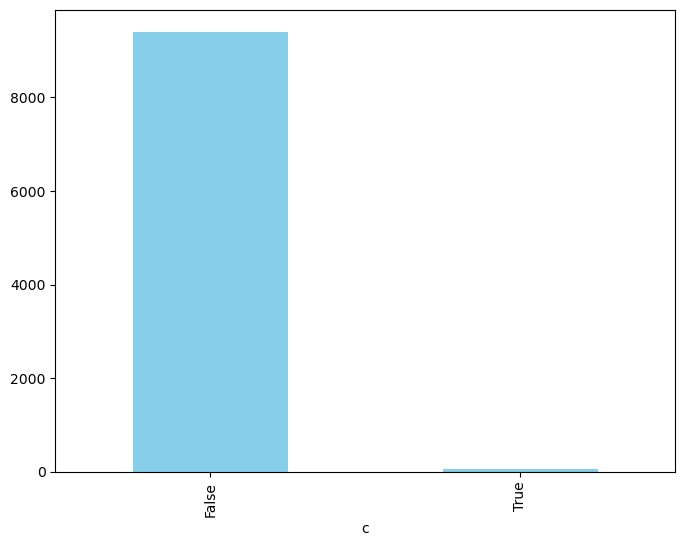

In [149]:
plt.figure(figsize=(8, 6))
set2['c'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

This dataset is completely imbalanced. To fix this we will use imbalanced class weights in order to tell our model to give more importance to minority class 

In [151]:
def run_expiriments_weighted(X, Y, scaler):
    warnings.filterwarnings("ignore")
    scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'balanced_accuracy_score': make_scorer(balanced_accuracy_score),
    'f1_score': make_scorer(f1_score, average='weighted'),
    'g_mean':make_scorer(geometric_mean_score, greater_is_better=True)
   }    
    pipelines = [
        ('Logistic Regression', Pipeline([('scaler', scaler), ('logistic', LogisticRegression(max_iter=1000,class_weight='balanced',random_state=1))])),
        ('Perceptron', Pipeline([('scaler', scaler), ('perceptron', Perceptron(max_iter=10000,class_weight='balanced', random_state=1))])),
        ('SVM Linear', Pipeline([('scaler', scaler), ('svm', SVC(kernel='linear', max_iter=10000,class_weight='balanced',random_state=1))])),
        ('SVM RBF', Pipeline([('scaler', scaler), ('svm', SVC(kernel='rbf',max_iter=10000,class_weight='balanced',random_state=1))])),
        ('Decision Tree', Pipeline([('scaler', scaler), ('classifier',DecisionTreeClassifier(random_state=1,class_weight='balanced'))])),
        ('Random Forest', Pipeline([('scaler', scaler), ('classifier',RandomForestClassifier(random_state=1,class_weight='balanced'))])),
        ('MLP', Pipeline([('scaler', scaler), ('classifier', MLPClassifier(activation='tanh', hidden_layer_sizes=(100,50), max_iter=1000, random_state=1))])),
    ]

    result_tables = []  

    for name, pipe in pipelines:
        cv_results = cross_validate(pipe, X, Y, cv=5, scoring=scorers, return_train_score=True)

        result_table = pd.DataFrame({
            'Classifier': [name],
            'Accuracy': [cv_results['test_accuracy_score'].mean()],
            'F1 Score': [cv_results['test_f1_score'].mean()],
            'Balanced Accuracy': [cv_results['test_balanced_accuracy_score'].mean()],
            'G_mean': [cv_results['test_g_mean'].mean()],
            'Fit Time': [cv_results['fit_time'].mean()]
        })

        result_tables.append(result_table)

    final_result_table = pd.concat(result_tables, ignore_index=True)
    return final_result_table

In [152]:
Y = np.array(set2.iloc[:, 38].astype(int))
X = np.array(set2.iloc[:,:38])
MC1_None=run_expiriments_weighted(X,Y,None)

In [153]:
MC1_None

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.867,0.922,0.815,0.810,0.933
1,Perceptron,0.063,0.107,0.498,0.229,0.014
2,SVM Linear,0.769,0.778,0.540,0.199,0.289
3,SVM RBF,0.936,0.961,0.764,0.742,3.147
4,Decision Tree,0.987,0.989,0.794,0.761,0.034
5,Random Forest,0.988,0.989,0.729,0.675,0.507
6,MLP,0.993,0.989,0.500,0.000,1.940


In [154]:

MC1_Standard=run_expiriments_weighted(X,Y,StandardScaler())

In [155]:
MC1_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.886,0.933,0.854,0.851,0.103
1,Perceptron,0.867,0.922,0.828,0.822,0.017
2,SVM Linear,0.875,0.927,0.841,0.837,0.870
3,SVM RBF,0.968,0.978,0.814,0.793,0.450
4,Decision Tree,0.987,0.989,0.794,0.761,0.038
5,Random Forest,0.988,0.989,0.729,0.675,0.532
6,MLP,0.994,0.993,0.667,0.575,7.808


In [156]:
MC1_MinMax=run_expiriments_weighted(X,Y,MinMaxScaler())

In [157]:
MC1_MinMax

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.850,0.912,0.844,0.843,0.044
1,Perceptron,0.705,0.794,0.770,0.738,0.019
2,SVM Linear,0.839,0.906,0.845,0.845,0.821
3,SVM RBF,0.856,0.916,0.838,0.835,0.944
4,Decision Tree,0.987,0.989,0.787,0.753,0.035
5,Random Forest,0.988,0.989,0.729,0.675,0.543
6,MLP,0.994,0.993,0.647,0.539,15.251


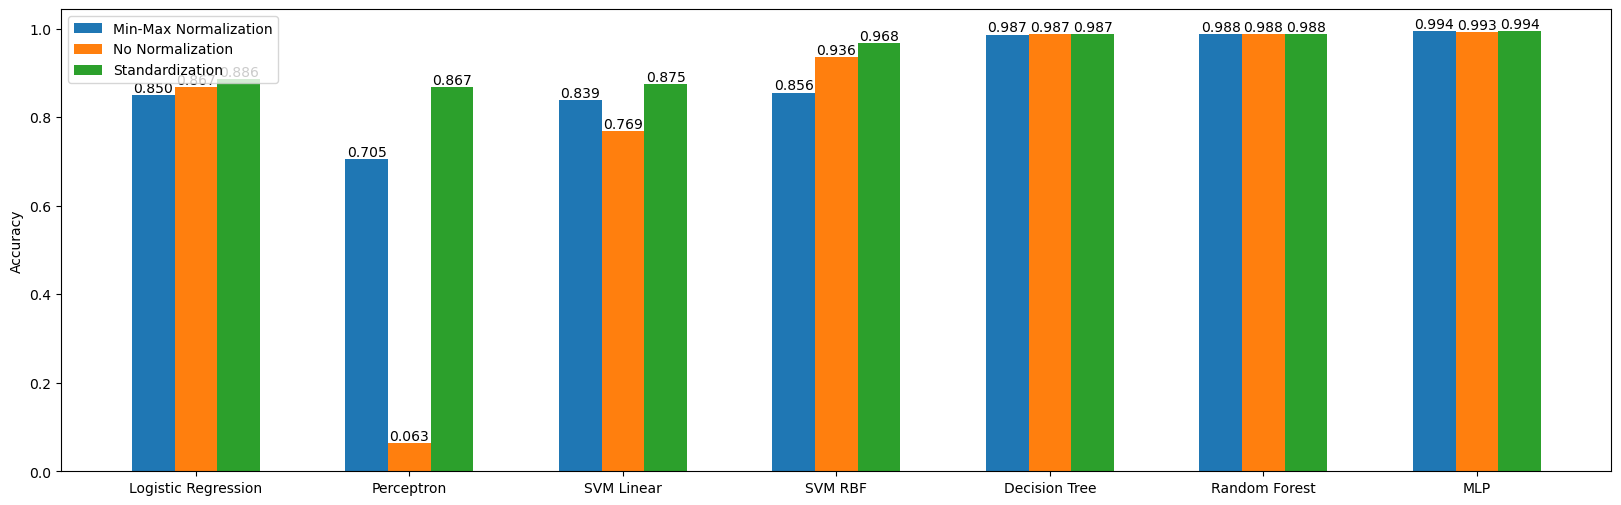

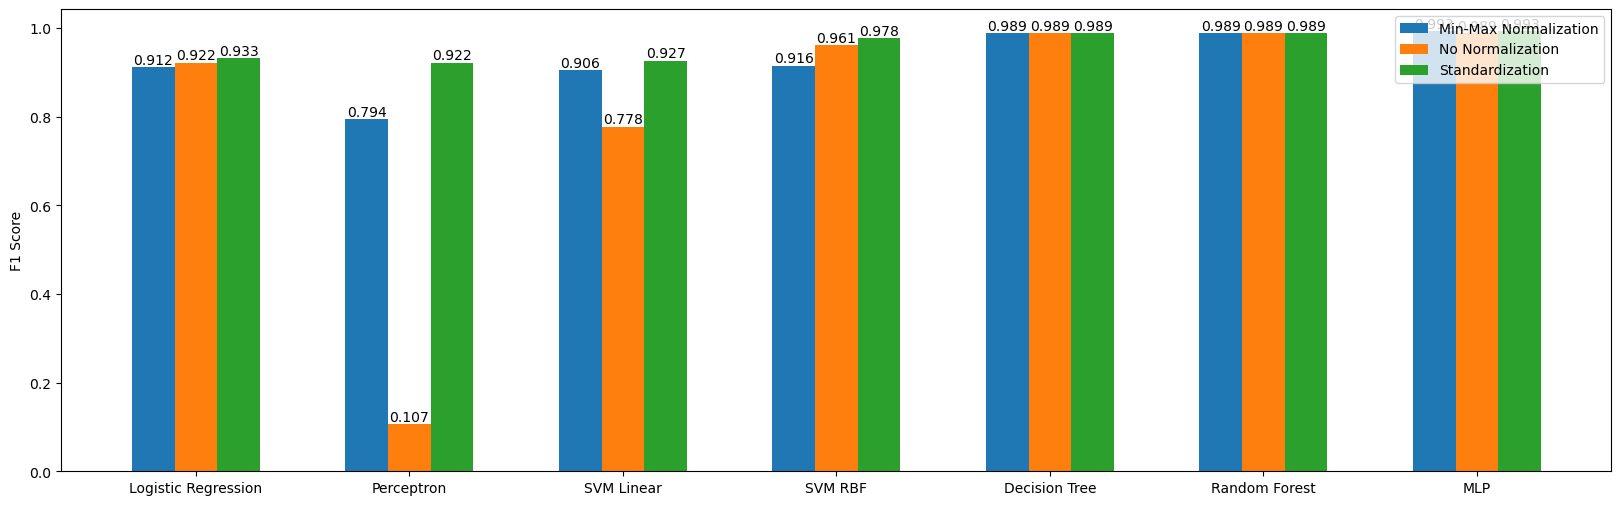

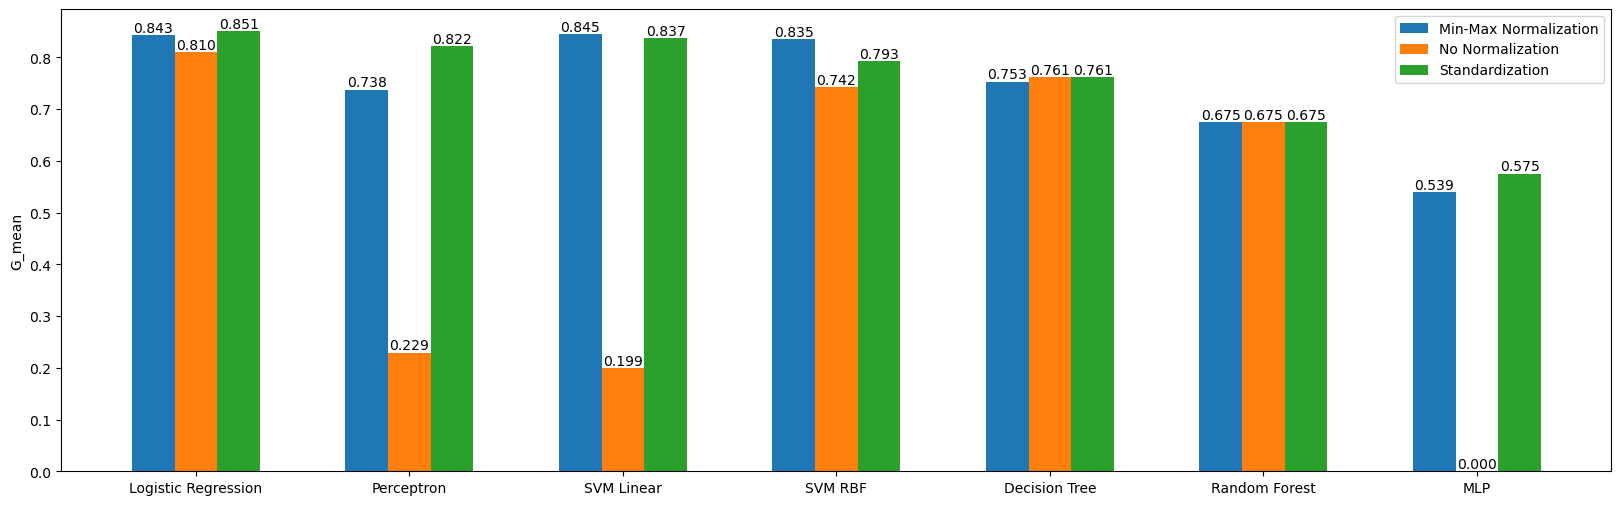

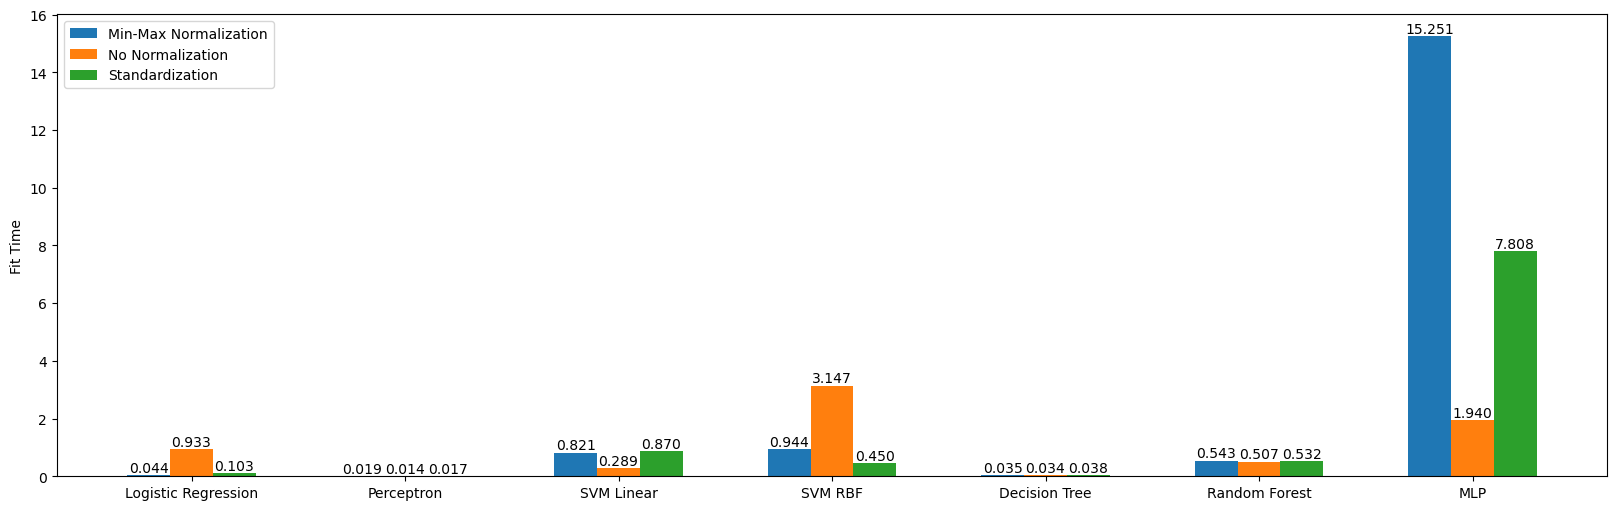

In [158]:
plot_experiment_results(MC1_MinMax, MC1_None, MC1_Standard)


Something interesting that we can clearly see it's the really poor perfomance at perceptron when we don't apply any Standardization method.
One possible explanation is the oscillation when we apply SGd. The algorithm seems to be stack at one point (a stationary point) and it can't move further. However we can transform our data we avoid this.

An another fact that we can evaluate is the G_mean 0 of the MLP. It fails completely to predict the minority class, and since the data are imbalaced a lot it's possible to archive high F1 score since it predict's well the majority class. In another words MLP understands that the minority class is useless.

Same story as previous dataset with SVM Linear and perceptron with or without perfoming data transformation. Maybe eliminates  the influence of overfitting.


Except from Perceptron and SVM Linear without data transformation we can see really high accurancies and F1 Score. The best perfomance in terms of accurancy is 99.4% with MLP. Such high accurancies it's propably a red flag of overfitting.

Decision Tree and Random Forest performs well in terms of accurancy and F1 but not that good in G_Mean compared with other models. This is also a sign of overfitting.

If take care of the three accurancies and want to find the best solution we will lead to logistic regression, since it's score well on accurancy,f1 and g_mean.


MLP has really big time with standardization methods and maybe we can explain this to numerical issues or zig-zag

RBF also take's much more time to compute the results without data transformation.

# Dataset 3

In [36]:
set3 = pd.read_csv('pc3.csv',sep=",")

Y = np.array(set3.iloc[:, 37])
X= np.array(set3.iloc[:,:37])


In [37]:
set3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1563 non-null   int64  
 1   BRANCH_COUNT                     1563 non-null   int64  
 2   CALL_PAIRS                       1563 non-null   int64  
 3   LOC_CODE_AND_COMMENT             1563 non-null   int64  
 4   LOC_COMMENTS                     1563 non-null   int64  
 5   CONDITION_COUNT                  1563 non-null   int64  
 6   CYCLOMATIC_COMPLEXITY            1563 non-null   int64  
 7   CYCLOMATIC_DENSITY               1563 non-null   float64
 8   DECISION_COUNT                   1563 non-null   int64  
 9   DECISION_DENSITY                 1563 non-null   float64
 10  DESIGN_COMPLEXITY                1563 non-null   int64  
 11  DESIGN_DENSITY                   1563 non-null   float64
 12  EDGE_COUNT          

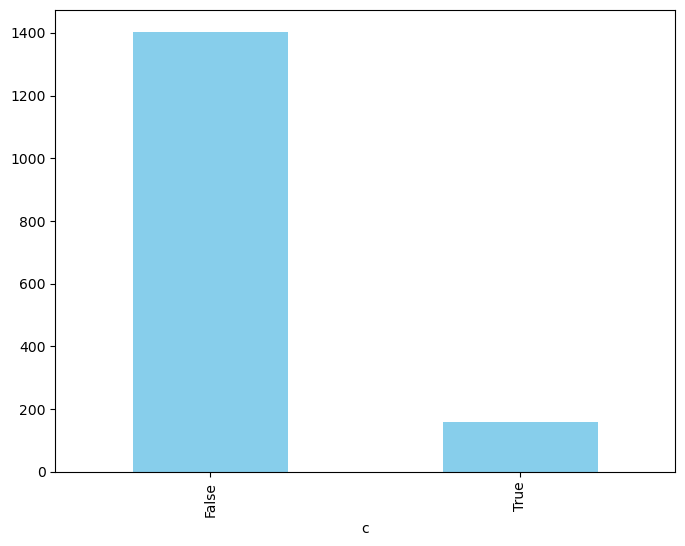

In [38]:
plt.figure(figsize=(8, 6))
set3['c'].value_counts().plot(kind='bar', color='skyblue')
plt.show()

In [39]:
PC3_None_1=run_expiriments_weighted(X,Y,None)

In [40]:
PC3_None_1

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.792,0.826,0.740,0.736,0.278
1,Perceptron,0.311,0.274,0.480,0.083,0.003
2,SVM Linear,0.731,0.761,0.612,0.480,0.075
3,SVM RBF,0.839,0.843,0.592,0.496,0.115
4,Decision Tree,0.857,0.859,0.624,0.548,0.025
5,Random Forest,0.901,0.874,0.571,0.385,0.430
6,MLP,0.898,0.849,0.500,0.000,0.276


In [41]:
PC3_Standard=run_expiriments_weighted(X,Y,StandardScaler())

In [42]:
PC3_Standard

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.779,0.817,0.752,0.749,0.021
1,Perceptron,0.670,0.733,0.675,0.674,0.005
2,SVM Linear,0.782,0.820,0.776,0.775,0.095
3,SVM RBF,0.797,0.829,0.751,0.748,0.076
4,Decision Tree,0.856,0.858,0.621,0.543,0.027
5,Random Forest,0.900,0.873,0.568,0.378,0.425
6,MLP,0.881,0.876,0.637,0.558,5.856


In [160]:
PC3_MinMaxScaler=run_expiriments_weighted(X,Y,MinMaxScaler())

In [161]:
PC3_MinMaxScaler

,Classifier,Accuracy,F1 Score,Balanced Accuracy,G_mean,Fit Time
0,Logistic Regression,0.850,0.912,0.844,0.843,0.062
1,Perceptron,0.705,0.794,0.770,0.738,0.022
2,SVM Linear,0.839,0.906,0.845,0.845,0.884
3,SVM RBF,0.856,0.916,0.838,0.835,0.915
4,Decision Tree,0.987,0.989,0.787,0.753,0.039
5,Random Forest,0.988,0.989,0.729,0.675,0.551
6,MLP,0.994,0.993,0.647,0.539,13.321


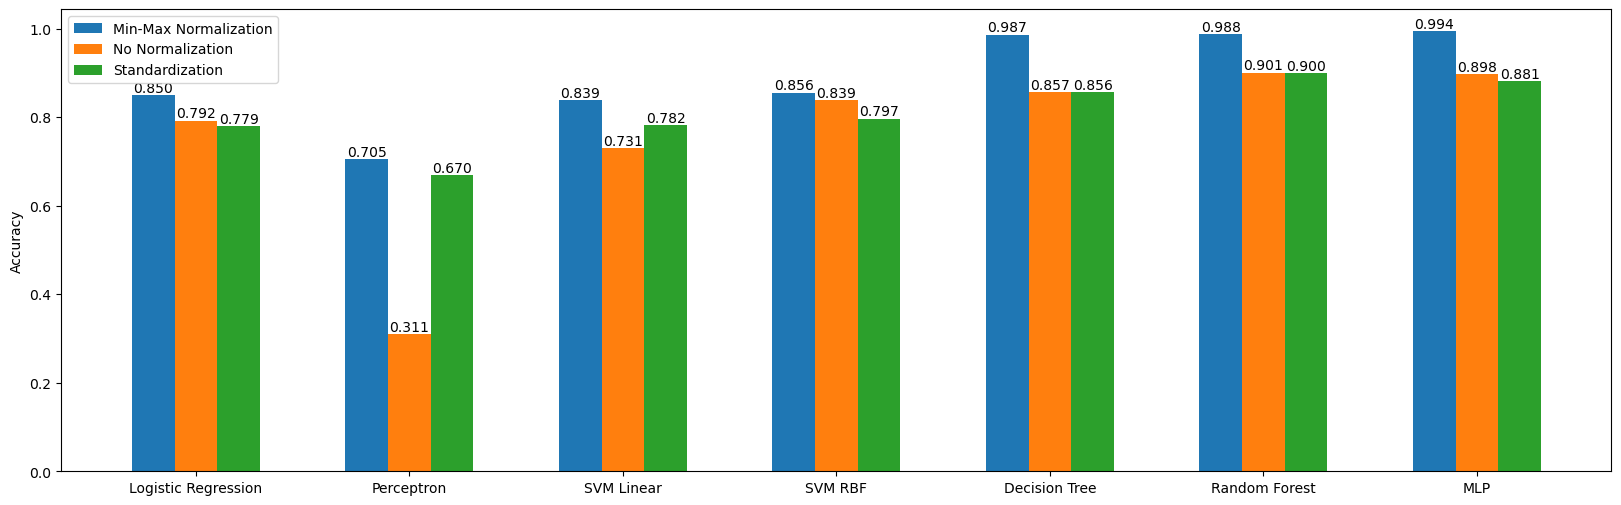

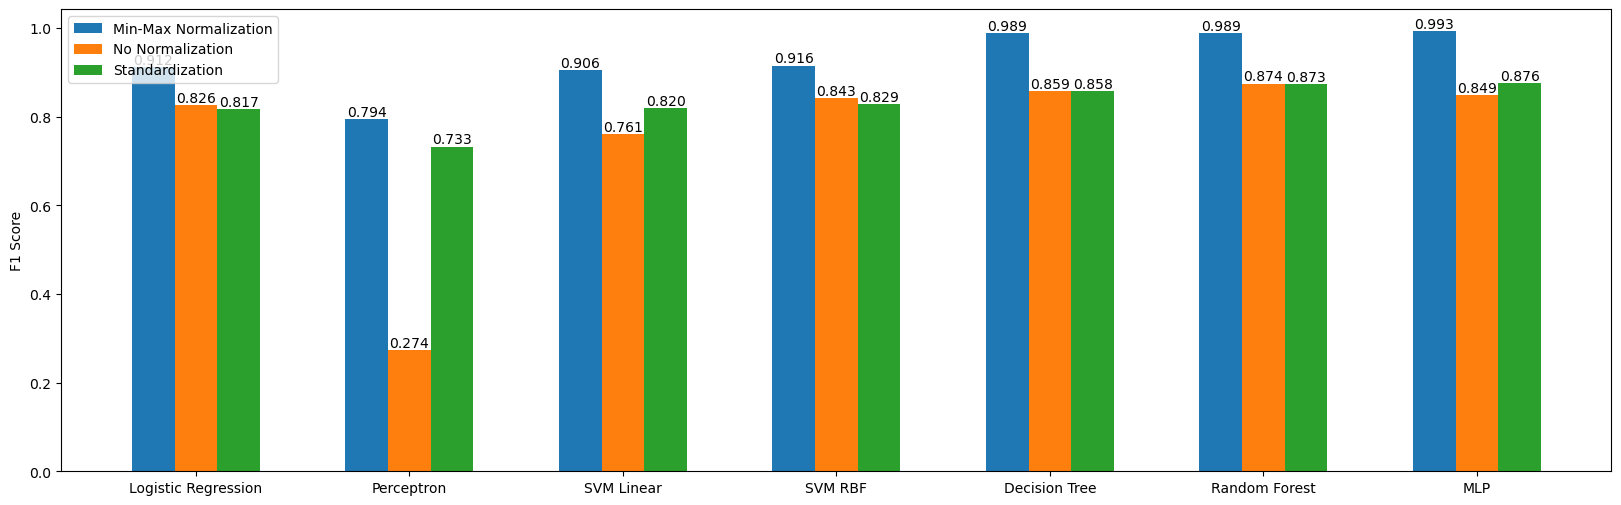

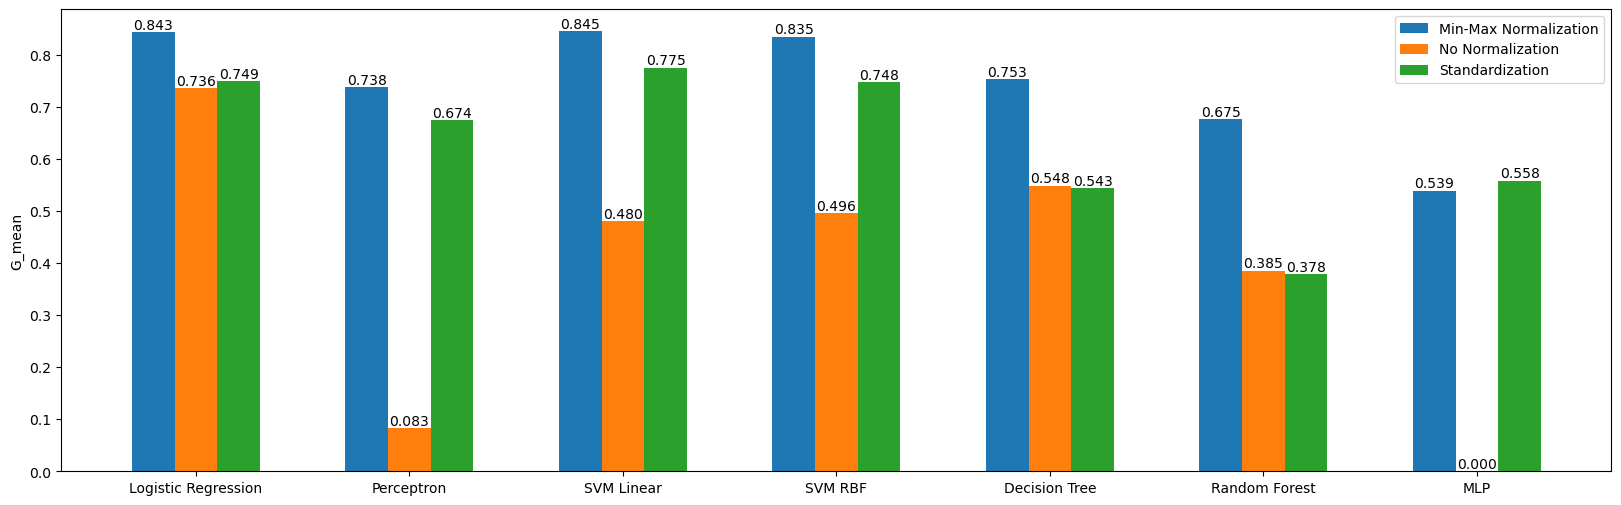

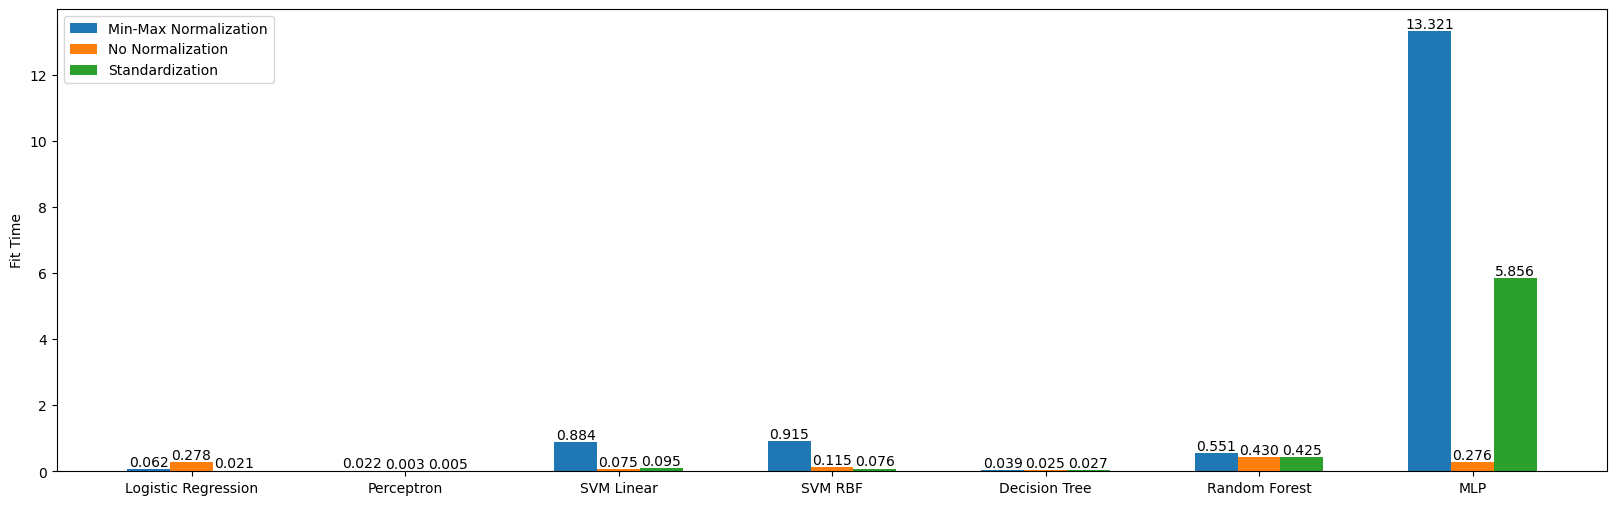

In [165]:
plot_experiment_results(PC3_MinMaxScaler, PC3_None_1, PC3_Standard)

Min Max Normalization we can see that give us better results on this dataset for every model and for every metric (except fit time)

MLPs high accurancy, high F1 score, and low G_Mean lead us to the decision that it's just overfit our data. We we transforming our data it takes much more to time to compute the results but seems to fail to do that

Perceptron has the same behaviour as previous and we give the same explanation for this.

In terms of accurancy perfoms better the Random Forest, with small difference compared to the decision trees . However the G_Mean scores is not that good as the others

Logistic Regression performs better if we compared in terms of F1,Accurancy and G_Mean

The fact that on SVM Linear and SVM RVD we have increased fit time but better G_Mean scores and F1_Scores maybe explained or in better understanding of the model or numerical issues 

# Final thoughts

All the datasets maybe need to be tested and evaluated by using other resampling methods.
Weight class balances can really help when we have imbalanced datasets( we can clearly see that on dataset 2 and 3)
When we have imbalanced dataset we care more for F1 score and G_Mean, and balanced accurancy instead of accurancy. That's why because we want to predict correct the minority class.
We can see somehow that both of the 3 dataset behaves the same, despite the fact that on dataset 1 we have less feautures. This can happend due to the fact that nature and the feautures of the phenomenon we are trying to explain is the same.
There is no always a good model. We have to check and evaluate always.
MLP , random Forest RBF and Decision Tree have more computation time.
Data transformation can help with outliers however Standardization is more highly affected since it use mean and std that it's already high due to the outliers.
That doesn't mean that Min Max is robust to outlier. It uses Max and Min values in order to do the transformations.

Outliers are handled here using normalization methods. However, it may be interesting to examine the outlier data itself, exploring their nature or applying other methods, such as clustering.